In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/consolidated_sensor_data.csv')
df

,Timestamp,acc_X,acc_Y,acc_Z,mag_X,mag_Y,mag_Z,gyro_X,gyro_Y,gyro_Z,activity
0,1.493997e+12,-2.145,-9.174,3.802,-14.22,39.54,1.50,0.716627,0.077405,-0.804956,downstairs
1,1.493997e+12,-0.612,-9.625,3.984,-14.22,39.54,1.50,0.527844,0.212630,-0.811484,downstairs
2,1.493997e+12,-0.641,-10.678,3.840,-14.22,39.54,1.50,0.338130,0.280309,-0.893285,downstairs
3,1.493997e+12,-0.201,-12.517,3.390,-14.22,39.54,1.50,-0.169065,0.236611,-1.147482,downstairs
4,1.493997e+12,-1.522,-12.536,3.323,-14.22,39.54,1.50,-0.561684,0.267120,-1.295763,downstairs
...,...,...,...,...,...,...,...,...,...,...,...
4737304,1.495486e+12,-0.747,3.217,-1.484,-11.10,-23.52,23.94,0.523581,-2.016787,-0.328271,walking
4737305,1.495486e+12,0.354,4.280,-0.632,-11.10,-23.52,23.94,0.523581,-2.016787,-0.328271,walking
4737306,1.495486e+12,0.459,5.650,-1.331,-11.10,-23.52,23.94,0.651079,-2.146683,-0.773248,walking
4737307,1.495486e+12,0.220,8.006,-2.729,-11.10,-23.52,23.94,0.853983,-2.254596,-1.033973,walking


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737309 entries, 0 to 4737308
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   acc_X      float64
 2   acc_Y      float64
 3   acc_Z      float64
 4   mag_X      float64
 5   mag_Y      float64
 6   mag_Z      float64
 7   gyro_X     float64
 8   gyro_Y     float64
 9   gyro_Z     float64
 10  activity   object 
dtypes: float64(10), object(1)
memory usage: 397.6+ MB


In [4]:
# Check missing values
df.isnull().sum()

,0
Timestamp,0
acc_X,0
acc_Y,0
acc_Z,0
mag_X,0
mag_Y,0
mag_Z,0
gyro_X,0
gyro_Y,0
gyro_Z,0


In [5]:
# Check total number of duplicates
df.duplicated().sum()

144158

In [6]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

In [7]:
df_cleaned.duplicated().sum()

0

In [8]:
df_cleaned.isna().sum()

,0
Timestamp,0
acc_X,0
acc_Y,0
acc_Z,0
mag_X,0
mag_Y,0
mag_Z,0
gyro_X,0
gyro_Y,0
gyro_Z,0


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4593151 entries, 0 to 4737308
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   acc_X      float64
 2   acc_Y      float64
 3   acc_Z      float64
 4   mag_X      float64
 5   mag_Y      float64
 6   mag_Z      float64
 7   gyro_X     float64
 8   gyro_Y     float64
 9   gyro_Z     float64
 10  activity   object 
dtypes: float64(10), object(1)
memory usage: 420.5+ MB


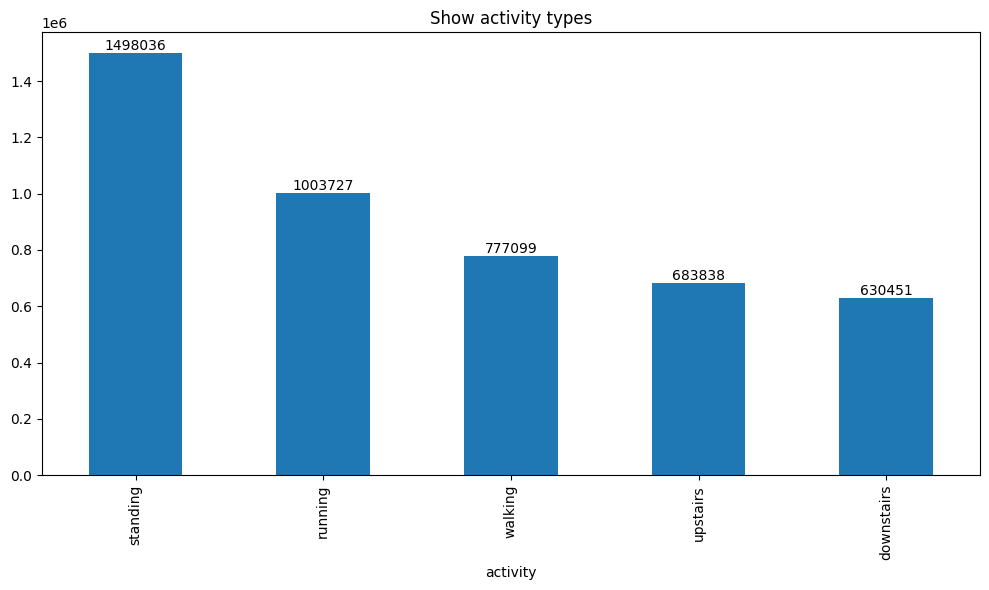

In [10]:
import matplotlib.pyplot as plt

# Create the plot with value labels
plt.figure(figsize=(10, 6))
counts = df_cleaned['activity'].value_counts()
ax = counts.plot(kind='bar', title='Show activity types')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
# Get unique activities
activities = df_cleaned['activity'].unique()
print(activities)

['downstairs' 'running' 'standing' 'upstairs' 'walking']


In [12]:
def plot_activity(activity, df):
    # Select first 200 samples for the specific activity
    data = df[df['activity'] == activity][['acc_X', 'acc_Y', 'acc_Z',
                                           'mag_X', 'mag_Y', 'mag_Z',
                                           'gyro_X', 'gyro_Y', 'gyro_Z']][:200]

    # Create subplots for acceleration, magnetometer, and gyroscope
    fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharex=True)
    fig.suptitle(f'Sensor Data for {activity}', fontsize=16)

    # Acceleration plots
    for i, col in enumerate(['acc_X', 'acc_Y', 'acc_Z']):
        data[col].plot(ax=axes[0, i], title=f'Acceleration {col}')

    # Magnetometer plots
    for i, col in enumerate(['mag_X', 'mag_Y', 'mag_Z']):
        data[col].plot(ax=axes[1, i], title=f'Magnetometer {col}')

    # Gyroscope plots
    for i, col in enumerate(['gyro_X', 'gyro_Y', 'gyro_Z']):
        data[col].plot(ax=axes[2, i], title=f'Gyroscope {col}')

    plt.tight_layout()
    plt.show()


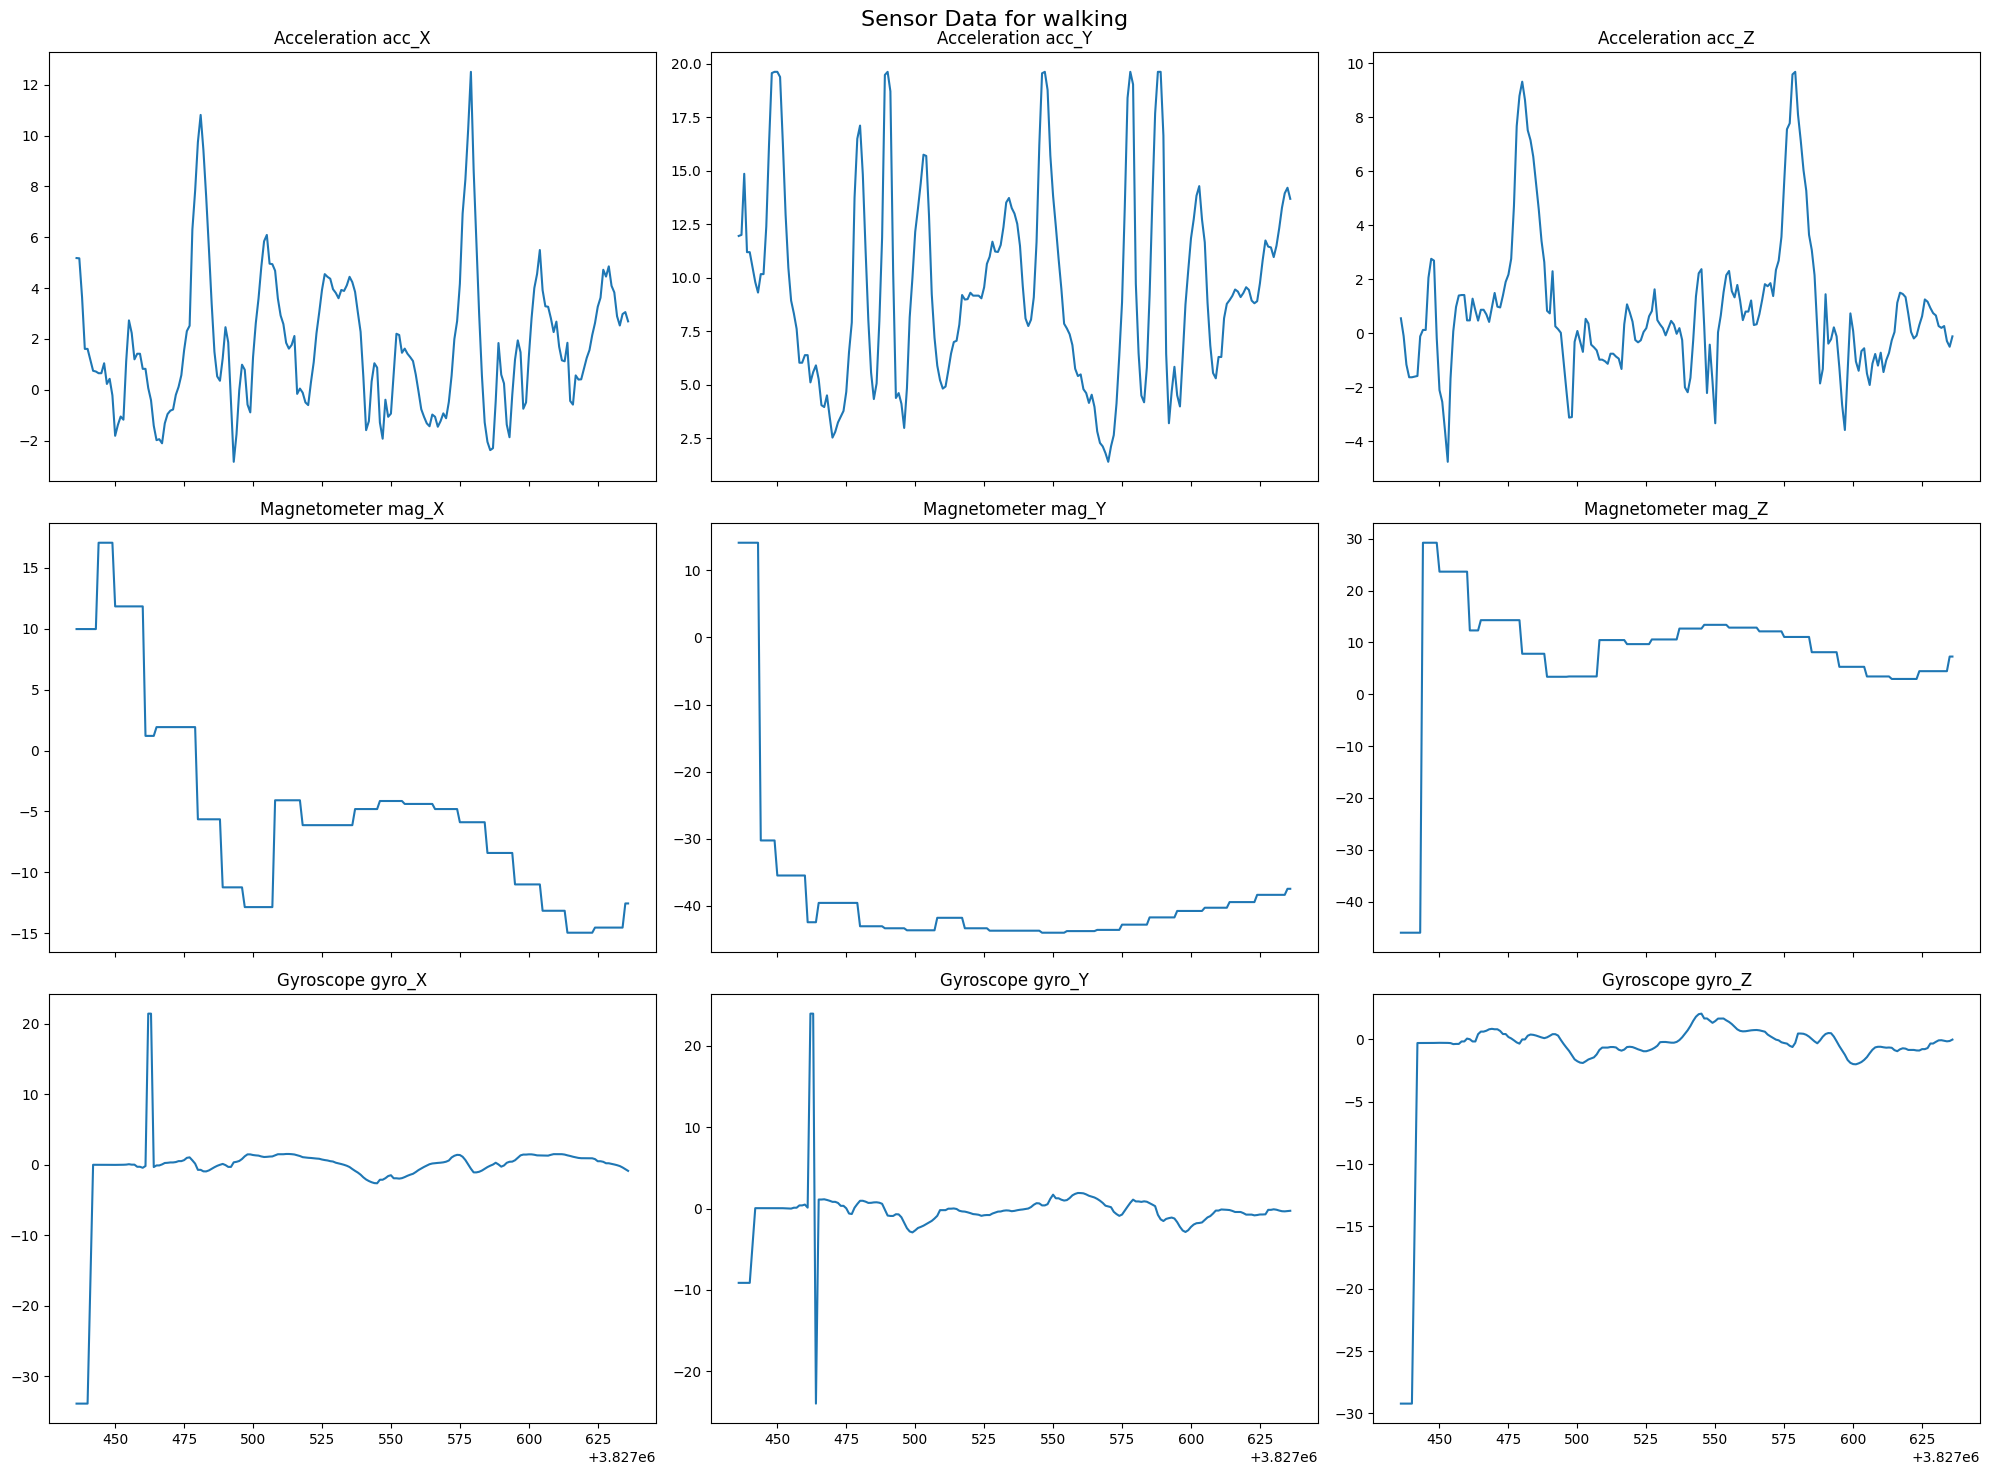

In [13]:
plot_activity('walking', df_cleaned)

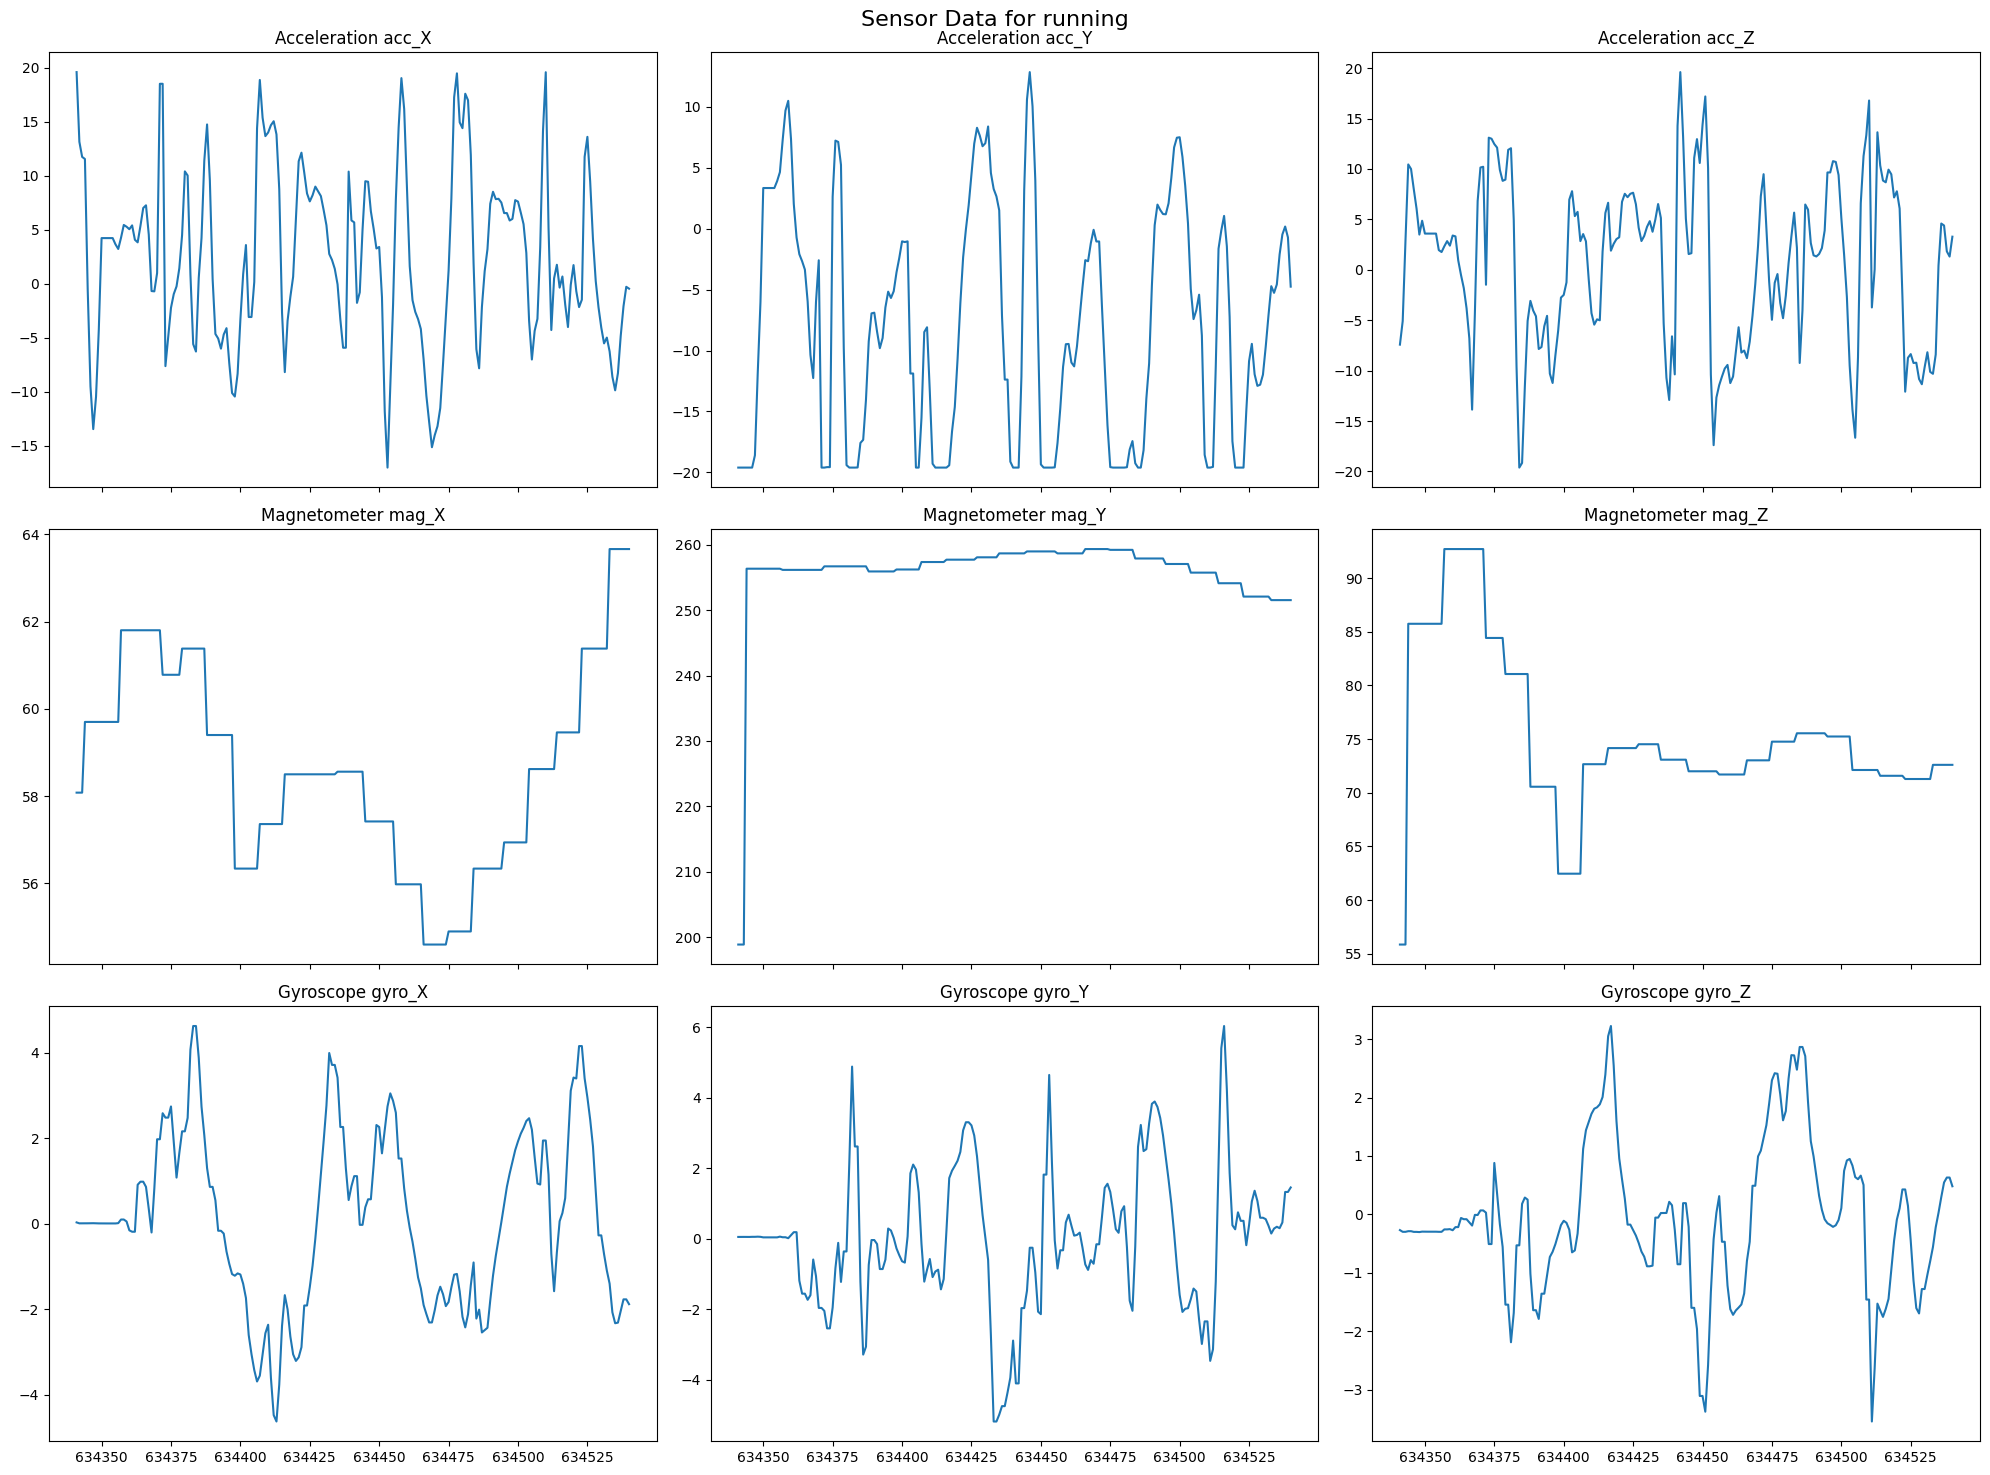

In [14]:
plot_activity('running', df_cleaned)

In [15]:
'''
# Convert to datetime with milliseconds
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], unit='ms')
'''

"\n# Convert to datetime with milliseconds\ndf_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'], unit='ms')\n"

In [16]:
'''
# Calculate time difference between rows
df_cleaned['time_diff'] = df_cleaned['Timestamp'].diff()

# Average time between samples
print(df_cleaned['time_diff'].mean())
'''

"\n# Calculate time difference between rows\ndf_cleaned['time_diff'] = df_cleaned['Timestamp'].diff()\n\n# Average time between samples\nprint(df_cleaned['time_diff'].mean())\n"

In [17]:
df_cleaned

,Timestamp,acc_X,acc_Y,acc_Z,mag_X,mag_Y,mag_Z,gyro_X,gyro_Y,gyro_Z,activity
0,1.493997e+12,-2.145,-9.174,3.802,-14.22,39.54,1.50,0.716627,0.077405,-0.804956,downstairs
1,1.493997e+12,-0.612,-9.625,3.984,-14.22,39.54,1.50,0.527844,0.212630,-0.811484,downstairs
2,1.493997e+12,-0.641,-10.678,3.840,-14.22,39.54,1.50,0.338130,0.280309,-0.893285,downstairs
3,1.493997e+12,-0.201,-12.517,3.390,-14.22,39.54,1.50,-0.169065,0.236611,-1.147482,downstairs
4,1.493997e+12,-1.522,-12.536,3.323,-14.22,39.54,1.50,-0.561684,0.267120,-1.295763,downstairs
...,...,...,...,...,...,...,...,...,...,...,...
4737304,1.495486e+12,-0.747,3.217,-1.484,-11.10,-23.52,23.94,0.523581,-2.016787,-0.328271,walking
4737305,1.495486e+12,0.354,4.280,-0.632,-11.10,-23.52,23.94,0.523581,-2.016787,-0.328271,walking
4737306,1.495486e+12,0.459,5.650,-1.331,-11.10,-23.52,23.94,0.651079,-2.146683,-0.773248,walking
4737307,1.495486e+12,0.220,8.006,-2.729,-11.10,-23.52,23.94,0.853983,-2.254596,-1.033973,walking


In [18]:
# LSTM  model expects fixed-length sequences as training data. We'll use a familiar method for generating these.
# Each generated sequence contains 200 training examples:

import numpy as np
from scipy import stats

N_TIME_STEPS = 200
N_FEATURES = 9
step = 20
segments = []
labels = []

for i in range(0, len(df_cleaned) - N_TIME_STEPS, step):
    acc_x = df_cleaned['acc_X'].values[i: i + N_TIME_STEPS]
    acc_y = df_cleaned['acc_Y'].values[i: i + N_TIME_STEPS]
    acc_z = df_cleaned['acc_Z'].values[i: i + N_TIME_STEPS]

    mag_x = df_cleaned['mag_X'].values[i: i + N_TIME_STEPS]
    mag_y = df_cleaned['mag_Y'].values[i: i + N_TIME_STEPS]
    mag_z = df_cleaned['mag_Z'].values[i: i + N_TIME_STEPS]

    gyro_x = df_cleaned['gyro_X'].values[i: i + N_TIME_STEPS]
    gyro_y = df_cleaned['gyro_Y'].values[i: i + N_TIME_STEPS]
    gyro_z = df_cleaned['gyro_Z'].values[i: i + N_TIME_STEPS]

    label = df_cleaned['activity'][i: i + N_TIME_STEPS].mode()[0]

    segments.append([acc_x, acc_y, acc_z, mag_x, mag_y, mag_z, gyro_x, gyro_y, gyro_z])
    labels.append(label)

segments = np.array(segments)
labels = np.array(labels)

In [19]:
np.array(segments).shape

(229648, 9, 200)

In [20]:
# Reshape and reorder dimensions to (samples, timesteps, features)
reshaped_segments = np.transpose(segments, (0, 2, 1))  # From (229648, 9, 200) -> (229648, 200, 9)
print("Input shape:", reshaped_segments.shape)

Input shape: (229648, 200, 9)


In [21]:
labels[55000]

'running'

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)  # Converts strings to integers

# Convert numeric labels to one-hot encoding
one_hot_labels = to_categorical(numeric_labels)

# Check shapes
print("Labels (numeric):", numeric_labels[:5])  # Example of numeric labels
print("Labels (one-hot):", one_hot_labels[:5])  # Example of one-hot encoded labels
print("One-hot labels shape:", one_hot_labels.shape)


Labels (numeric): [0 0 0 0 0]
Labels (one-hot): [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
One-hot labels shape: (229648, 5)


In [23]:
# Print the mapping
for i, label in enumerate(label_encoder.classes_):
    print(f"Label '{label}' corresponds to one-hot index {i} → {to_categorical(i, num_classes=len(label_encoder.classes_))}")


Label 'downstairs' corresponds to one-hot index 0 → [1. 0. 0. 0. 0.]
Label 'running' corresponds to one-hot index 1 → [0. 1. 0. 0. 0.]
Label 'standing' corresponds to one-hot index 2 → [0. 0. 1. 0. 0.]
Label 'upstairs' corresponds to one-hot index 3 → [0. 0. 0. 1. 0.]
Label 'walking' corresponds to one-hot index 4 → [0. 0. 0. 0. 1.]


In [24]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_segments, one_hot_labels, test_size=0.3, random_state=42, stratify=one_hot_labels
)
# stratify=labels: Ensures that the training and test sets have similar class distributions
# Verify the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (160753, 200, 9)
X_test shape: (68895, 200, 9)
y_train shape: (160753, 5)
y_test shape: (68895, 5)


In [25]:
print(f"X_train dtype: {X_train.dtype}")
print(f"y_train dtype: {y_train.dtype}")


X_train dtype: float64
y_train dtype: float64


In [26]:
# Ensure input data is float32
def prepare_data(X_train, y_train):
    X_train = tf.cast(X_train, tf.float32)
    y_train = tf.cast(y_train, tf.float32)
    return X_train, y_train

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, LSTMCell, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [28]:
# Hyperparameters

# Data dimensions
N_TIME_STEPS = 200
N_FEATURES = 9
N_CLASSES = 5

# Model parameters
LEARNING_RATE = 0.001
BATCH_SIZE = 1024
EPOCHS = 20
DROPOUT_RATE = 0.2

In [29]:
# Define the model using LSTMCell instead of LSTM
def create_model():
    model = Sequential([
        # First LSTM Layer using RNN and LSTMCell
        RNN(LSTMCell(128),
            input_shape=(N_TIME_STEPS, N_FEATURES),
            return_sequences=True,
            dtype=tf.float32),  # Explicitly set dtype
        BatchNormalization(),
        Dropout(DROPOUT_RATE),

        # Second LSTM Layer
        RNN(LSTMCell(64),
            return_sequences=False,
            dtype=tf.float32),  # Explicitly set dtype
        BatchNormalization(),
        Dropout(DROPOUT_RATE),

        # Fully connected layer
        Dense(64, activation='relu'),
        Dropout(DROPOUT_RATE),

        # Output layer
        Dense(N_CLASSES, activation='softmax')
    ])

    return model

# Convert input data to float32
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Create and compile model
model = create_model()
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rnn (RNN)                            │ (None, 200, 128)            │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rnn_1 (RNN)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,317 (489.52 KB)

 Trainable params: 124,933 (488.02 KB)

 Non-trainable params: 384 (1.50 KB)

In [30]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 37s 219ms/step - accuracy: 0.6241 - loss: 0.9391 - val_accuracy: 0.8539 - val_loss: 0.3982
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.8564 - loss: 0.3483 - val_accuracy: 0.9017 - val_loss: 0.2455
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.9031 - loss: 0.2428 - val_accuracy: 0.9300 - val_loss: 0.1798
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9305 - loss: 0.1849 - val_accuracy: 0.9397 - val_loss: 0.1578
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9478 - loss: 0.1438 - val_accuracy: 0.9543 - val_loss: 0.1192
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.9573 - loss: 0.1230 - val_accuracy: 0.9644 - val_loss: 0.0974
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - accuracy: 0.9642 - loss: 0.1021 - val_accuracy: 0.9656 - val_loss: 0.0957
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.9673 - loss: 0

In [31]:
# Save the model
model.save("harLSTM_model.h5")
print("Model saved successfully.")

Model saved successfully.


In [32]:
def convert_to_tflite(model_path, tflite_path):
    # Load the saved model
    model = tf.keras.models.load_model(model_path)

    # Create TFLite converter
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Enable TF ops and optimization
    converter.target_spec.supported_ops = [
        tf.lite.OpsSet.TFLITE_BUILTINS,
        tf.lite.OpsSet.SELECT_TF_OPS
    ]

    # Set input and output types to float32
    converter.target_spec.supported_types = [tf.float32]
    converter.inference_input_type = tf.float32
    converter.inference_output_type = tf.float32

    # Enable optimization
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    converter.allow_custom_ops = True

    try:
        # Convert the model
        tflite_model = converter.convert()

        # Save the model
        with open(tflite_path, 'wb') as f:
            f.write(tflite_model)

        print(f"TFLite model saved successfully at {tflite_path}")
        return tflite_model

    except Exception as e:
        print(f"Error during conversion: {str(e)}")
        raise

In [33]:
def verify_tflite_model(tflite_model, sample_input):
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Prepare input data - ensure float32
    input_shape = input_details[0]['shape']
    input_data = sample_input[0:1].astype(np.float32)

    # Test the model
    interpreter.set_tensor(input_details[0]['index'], input_data)

    try:
        interpreter.invoke()
        output_data = interpreter.get_tensor(output_details[0]['index'])
        print("TFLite Model Verification:")
        print(f"Input shape: {input_shape}")
        print(f"Output shape: {output_data.shape}")
        print(f"Input dtype: {input_data.dtype}")
        print(f"Output dtype: {output_data.dtype}")
        return True
    except Exception as e:
        print(f"Error during verification: {str(e)}")
        return False

In [34]:
tflite_model = convert_to_tflite("harLSTM_model.h5", "harLSTM_model.tflite")
# Save the TFLite model
with open('harLSTM_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpqjnh2q_j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 200, 9), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139371132953424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371132959936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371132951312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371132968400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371132970160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371132967168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371132968928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371133110224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371133115680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371133117088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139371133120080: Ten

In [35]:
import pickle

# Save predictions and training history
# You can get predictions on the training or test set for saving
predictions = model.predict(X_test)  # Predictions on the test set
pickle.dump(predictions, open("predictions.p", "wb"))  # Save predictions
pickle.dump(history.history, open("history.p", "wb"))  # Save training history
print("Predictions and history saved successfully.")

2153/2153 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step
Predictions and history saved successfully.


In [36]:
from tensorflow.keras.models import load_model

# Load the model and history
loaded_model = load_model("harLSTM_model.h5")  # Load the saved model
print("Model loaded successfully.")

Model loaded successfully.


In [37]:
# Recompile the model to suppress the warning and prepare for evaluation or further training
loaded_model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Model recompiled successfully.")

Model recompiled successfully.


In [38]:
# Evaluate the model to verify performance
loss, accuracy = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded model accuracy: {accuracy:.4f}, loss: {loss:.4f}")

Loaded model accuracy: 0.9886, loss: 0.0395


In [39]:
from sklearn.metrics import classification_report

# Get predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_test_labels, y_pred_labels)
print(report)

2153/2153 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9455
           1       1.00      0.99      0.99     15056
           2       1.00      1.00      1.00     22471
           3       0.98      0.98      0.98     10258
           4       1.00      0.98      0.99     11655

    accuracy                           0.99     68895
   macro avg       0.99      0.99      0.99     68895
weighted avg       0.99      0.99      0.99     68895



In [40]:
# Load the training history
with open("history.p", "rb") as file:
    loaded_history = pickle.load(file)

# Check keys in the loaded history
print("Keys in loaded_history:", loaded_history.keys())

Keys in loaded_history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Keys in loaded_history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


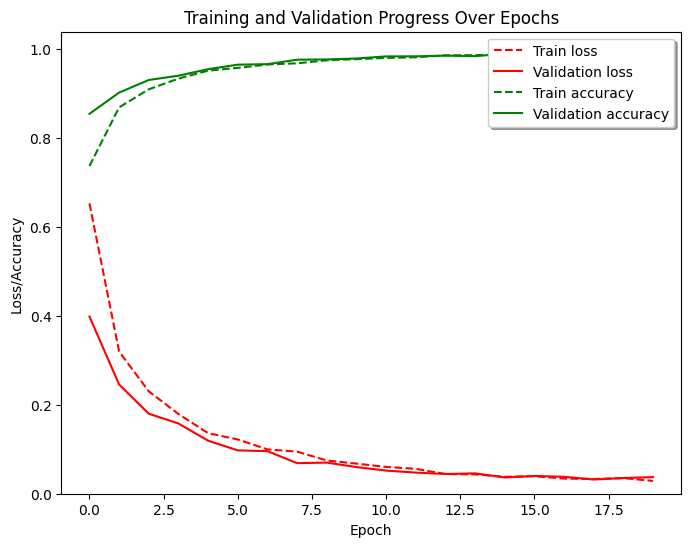

In [41]:
# Assuming loaded_history is a dictionary containing your training history
# Example: loaded_history = pickle.load(open("history.p", "rb"))

plt.figure(figsize=(8, 6))

# Check keys in loaded_history to confirm structure
print("Keys in loaded_history:", loaded_history.keys())

# Plot training and validation loss
plt.plot(loaded_history['loss'], "r--", label="Train loss")  # Training loss
plt.plot(loaded_history['val_loss'], "r-", label="Validation loss")  # Validation loss

# Plot training and validation accuracy
plt.plot(loaded_history['accuracy'], "g--", label="Train accuracy")  # Training accuracy
plt.plot(loaded_history['val_accuracy'], "g-", label="Validation accuracy")  # Validation accuracy

# Add labels, title, and legend
plt.title("Training and Validation Progress Over Epochs")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.ylim(0)
plt.show()


In [42]:
LABELS = label_encoder.classes_  # Retrieve class labels from the encoder
print("Labels:", LABELS)

Labels: ['downstairs' 'running' 'standing' 'upstairs' 'walking']


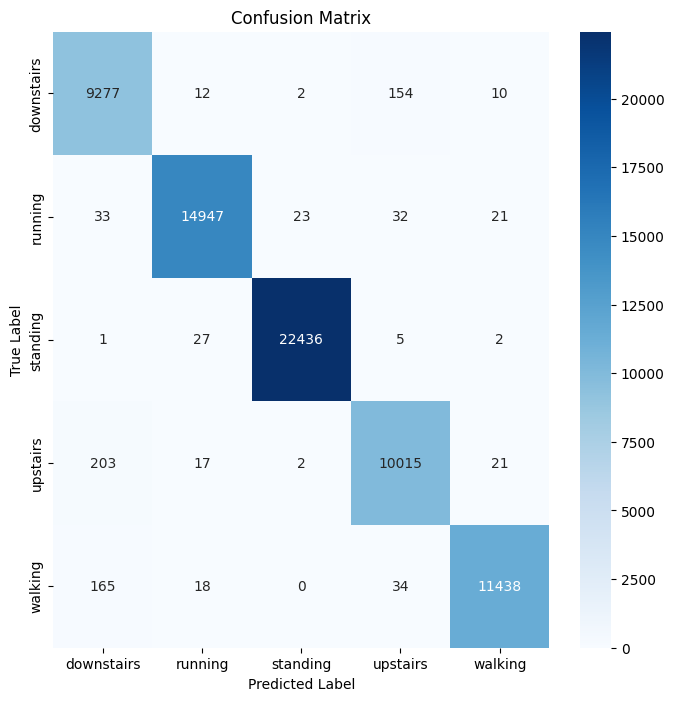

In [43]:
from sklearn import metrics
import seaborn as sns

# Convert one-hot-encoded y_test and predictions to class indices
max_test = np.argmax(y_test, axis=1)  # True labels
max_predictions = np.argmax(predictions, axis=1)  # Predicted labels

# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
